# Preprocess

In this notebook we will be clean the dataset. We will also extract and manipulate any features that may be useful for generating predicitons.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/Medical Appointments.csv')
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


## Clean

First we will remove any invalid values from the dataset.

In [3]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


We can see that there are no `null` values in the dataset. However, we can see that some features have invalid values e.g. There are some patients whose `Age` are set to `-1`.

In [4]:
# Remove rows where the Age value is invalid
clean_data = data[data.Age > -1]

## Remove Outliers

We will now find any outliers in our dataset and remove them. 

**Note:** The main reason we are doing this is because outliers can badly effect the accuracy of decision trees that we will likely be using later.

Rejection 5 points
z-score of 3 corresponds to a prob of 0.27%


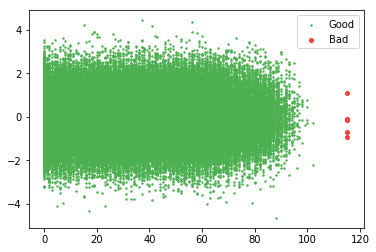

In [5]:
# Analyse the outliers in age
age = clean_data.Age

mean, std = np.mean(age), np.std(age)
z_score = np.abs((age-mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=age.size)
plt.scatter(age[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(age[~good], visual_scatter[~good], s=16, label="Bad", color="#F44336")
plt.legend();


In [6]:
min(age[~good])

115

We can see here that there are 5 outlier values for the `Age` values. These bad values are patients who's `Age >= 115`

In [7]:
# Remove the outliers for Age
clean_data = clean_data[clean_data.Age < 115]

Rejection 2237 points
z-score of 3 corresponds to a prob of 0.27%


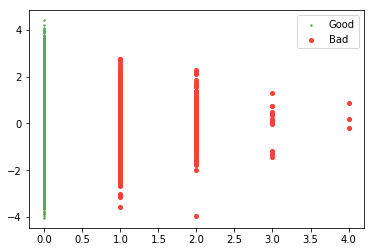

In [8]:
# Handcap
handcap = clean_data.Handcap

mean, std = np.mean(handcap), np.std(handcap)
z_score = np.abs((handcap-mean) / std)
threshold = 3
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=handcap.size)
plt.scatter(handcap[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(handcap[~good], visual_scatter[~good], s=16, label="Bad", color="#F44336")
plt.legend();


We can see that this is a categorical variable and so we will not remove any outliers.

## Feature Manipulation

In [9]:
%%capture

# We are going to change the No-Show variable into a boolean
clean_data.at[clean_data['No-show'] == 'Yes', 'No-show'] = True
clean_data.at[clean_data['No-show'] == 'No', 'No-show'] = False

## Feature Creation

We are now going to create some features that might be useful for our predictions.

#### booking_window_days
Create a feature for the distance between the appointment day and the scheduled day.

In [10]:
%%capture

import datetime

clean_data['AppointmentDay'] = clean_data.AppointmentDay.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
clean_data['ScheduledDay'] = clean_data.ScheduledDay.apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%dT%H:%M:%SZ'))
clean_data['booking_window_days'] = (clean_data['AppointmentDay'] - clean_data['ScheduledDay']) \
                                        .apply(lambda x: np.abs(x.days))

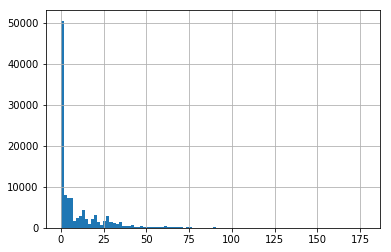

Rejection 78 points
z-score of 3 corresponds to a prob of 0.00%


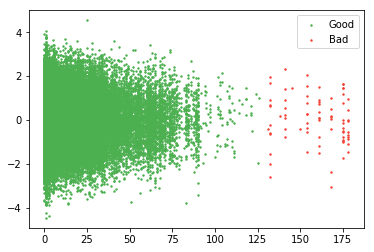

In [11]:
# Distribution of 'booking_window_days'
clean_data['booking_window_days'].hist(bins=100)
plt.show();

# Find any outliers in the booking_window_days
booking_window = clean_data.booking_window_days

mean, std = np.mean(booking_window), np.std(booking_window)
z_score = np.abs((booking_window-mean) / std)
threshold = 8
good = z_score < threshold

print(f"Rejection {(~good).sum()} points")
from scipy.stats import norm
print(f"z-score of 3 corresponds to a prob of {100 * 2 * norm.sf(threshold):0.2f}%")
visual_scatter = np.random.normal(size=booking_window.size)
plt.scatter(booking_window[good], visual_scatter[good], s=2, label="Good", color="#4CAF50")
plt.scatter(booking_window[~good], visual_scatter[~good], s=2, label="Bad", color="#F44336")
plt.legend();

In [12]:
min(booking_window[~good])

131

In [13]:
clean_data = clean_data[clean_data.booking_window_days < 131]

From the above we can see that there aren't any outliers to remove here.

#### AppointmentDayOfWeek

Get the day of the week that the appointment was on.

In [14]:
%%capture
clean_data['AppointmentDayOfWeek'] = clean_data['AppointmentDay'].apply(lambda x: x.dayofweek)

#### ScheduledHour

Get the hour of the day that the appointment was scheduled.

In [15]:
%%capture
clean_data['ScheduledHour'] =  clean_data['ScheduledDay'].apply(lambda x: x.hour)

#### Other Features

We are also going to create a number of other features but these can only be created once we have split the dataset into train/test sets.

## Save Dataset

In [16]:
clean_data.to_csv('../data/clean_data.csv', index=False)